# Deep Learning Demo on MNIST Dataset
- MNIST is a classic dataset consisting of images of handwritten digits (0-9). The task is to identify the digit in each image i.e. this is a multi-class classification setting.
- We will train a neural network to do this using PyTorch.

In [5]:
# imports!
# note torch, i.e PyTorch, a popular ML library
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [7]:
# Define neural network architecture
class MyNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),  # Output layer for 10 classes
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x) #does all the math for you
        return logits

In [8]:
# # Set up device for training (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the neural network, loss function, and optimizer
model = MyNN().to(device) #creating model
criterion = nn.CrossEntropyLoss() #loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) #optimizer: does all the gradient descent stuff for you

# Training loop
num_epochs = 5 #number of times you want to go through the dataset (SETTING TOO HIGH WILL OVERFIT)
train_losses = []

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()  # Clear previous gradients
        output = model(data)  # Forward pass
        loss = criterion(output, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_train_loss:.4f}')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 43.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.05MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.53MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/5, Loss: 0.2796
Epoch 2/5, Loss: 0.1358
Epoch 3/5, Loss: 0.0989
Epoch 4/5, Loss: 0.0824
Epoch 5/5, Loss: 0.0701


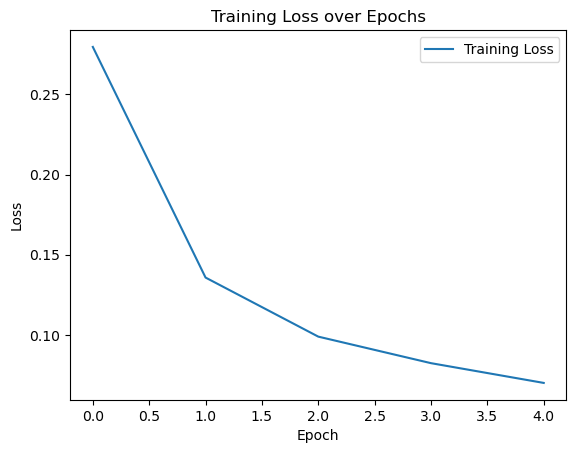

Test Accuracy: 97.56%


In [10]:
# Plot training loss over epochs
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Test the model on the test set
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)  # Get predicted labels
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

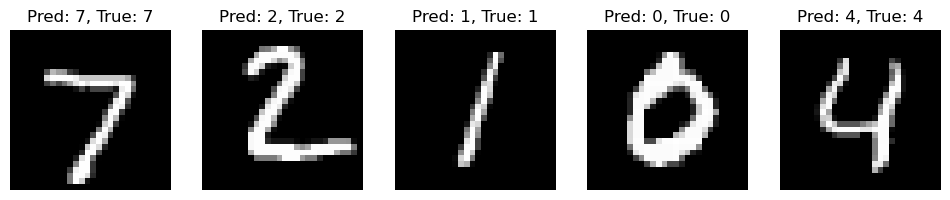

In [11]:
# Display some test images and predictions
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
output = model(data)
_, predicted = torch.max(output, 1)

fig, axes = plt.subplots(1, 5, figsize=(12, 5))
for i in range(5):
    axes[i].imshow(data[i].cpu().numpy().squeeze(), cmap='gray')
    axes[i].set_title(f'Pred: {predicted[i].item()}, True: {target[i].item()}')
    axes[i].axis('off')
plt.show()